<a href="https://colab.research.google.com/github/sourabh9632/KenGen_Website/blob/main/Attrition_data_anylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Analysis**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnigns
import warnings
warnings.filterwarnings('ignore')

# formating the notebook
pd.set_option('display.max_columns', None)

In [13]:
data = pd.read_csv("/content/employee_data.csv")

In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [19]:
data.shape


(1470, 35)

In [20]:
print(f'the row data is {data.shape[0]} & coloumns is {data.shape[1]}')

the row data is 1470 & coloumns is 35


In [42]:
#basic valadition

#Data type , data missing value , sample data

data_val = pd.DataFrame({
    'DataTypes' :data.dtypes,
    'MissingValPercentage':round(data.isnull().mean(),2)
})

sample_data = pd.DataFrame(data.head(2))
sample_data = pd.DataFrame(data.head(2).T)

sample_data.rename(columns={0: 'Sample_1', 1: 'Sample_2'}, inplace=True)
data_val=pd.concat([data_val,sample_data],axis=1)
data_val


,DataTypes,MissingValPercentage,Sample_1,Sample_2
Age,int64,0.0,41,49
Attrition,object,0.0,Yes,No
BusinessTravel,object,0.0,Travel_Rarely,Travel_Frequently
DailyRate,int64,0.0,1102,279
Department,object,0.0,Sales,Research & Development
DistanceFromHome,int64,0.0,1,8
Education,int64,0.0,2,1
EducationField,object,0.0,Life Sciences,Life Sciences
EmployeeCount,int64,0.0,1,1
EmployeeNumber,int64,0.0,1,2


In [48]:
# Number of numerical and categorical features

num,obj = 0,0
for cols in data.columns:
  if data[cols].dtype != "O":
    num += 1;
  else:
    obj += 1;

print(f'the number are {num} & categories  are {obj}')

the number are 26 & categories  are 9


In [49]:
print(f'the number of duplicate values are {data[data.duplicated()].shape[0]}' )

the number of duplicate values are 0


In [56]:
for cols in data.columns:
  if data[cols].dtype =="O":
      if data[cols].nunique() == 1:
            print(f'** {cols} has {data[cols].nunique()} unique values. **')
      else:
          print(f'{cols} has {data[cols].nunique()} unique values.')





Attrition has 2 unique values.
BusinessTravel has 3 unique values.
Department has 3 unique values.
EducationField has 6 unique values.
Gender has 2 unique values.
JobRole has 9 unique values.
MaritalStatus has 3 unique values.
** Over18 has 1 unique values. **
OverTime has 2 unique values.


In [57]:
for cols in data.columns:
    if data[cols].dtype == 'O':
        if data[cols].nunique() == 1:
            print(f'** {cols} has {data[cols].nunique()} unique values. **')
        else:
            print(f'{cols} has {data[cols].nunique()} unique values.')

Attrition has 2 unique values.
BusinessTravel has 3 unique values.
Department has 3 unique values.
EducationField has 6 unique values.
Gender has 2 unique values.
JobRole has 9 unique values.
MaritalStatus has 3 unique values.
** Over18 has 1 unique values. **
OverTime has 2 unique values.


In [61]:
for cols in data.columns:
  if data[cols].dtype!= 0:
    if data[cols].nunique() in [1, data.shape[0]]:
      print(f'**{cols} has {data[cols].nunique()} unique values **')
    else:
      print(f'{cols} has {data[cols].nunique()} unique values ')

Age has 43 unique values 
Attrition has 2 unique values 
BusinessTravel has 3 unique values 
DailyRate has 886 unique values 
Department has 3 unique values 
DistanceFromHome has 29 unique values 
Education has 5 unique values 
EducationField has 6 unique values 
**EmployeeCount has 1 unique values **
**EmployeeNumber has 1470 unique values **
EnvironmentSatisfaction has 4 unique values 
Gender has 2 unique values 
HourlyRate has 71 unique values 
JobInvolvement has 4 unique values 
JobLevel has 5 unique values 
JobRole has 9 unique values 
JobSatisfaction has 4 unique values 
MaritalStatus has 3 unique values 
MonthlyIncome has 1349 unique values 
MonthlyRate has 1427 unique values 
NumCompaniesWorked has 10 unique values 
**Over18 has 1 unique values **
OverTime has 2 unique values 
PercentSalaryHike has 15 unique values 
PerformanceRating has 2 unique values 
RelationshipSatisfaction has 4 unique values 
**StandardHours has 1 unique values **
StockOptionLevel has 4 unique values 
To

In [63]:
print(f'number of coloumns before data cleaning',data.shape[1])

number of coloumns before data cleaning 35


In [64]:
data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [65]:
print(f'number of coloumns After data cleaning',data.shape[1])

number of coloumns After data cleaning 31


In [66]:
 #Analysing the dependent / target column

data['Attrition'].value_counts(normalize=True)*100,2


      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  

In [67]:
round(data['Attrition'].value_counts(normalize=True)*100,2)

,proportion
Attrition,
No,83.88
Yes,16.12


In [ ]:
# sns.countplot(...):

# Plots the count of each category (e.g., "Yes" and "No") in "Attrition".
# x='Attrition':

# Specifies that "Attrition" is on the x-axis.
# data=data:

# Uses the data DataFrame.
# order=data['Attrition'].value_counts().index:

# Orders the bars based on the count (highest first).

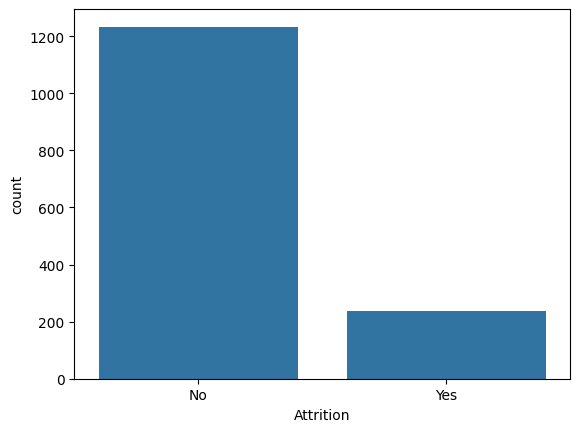

In [70]:
# Plotting the graph for the target data

ax = sns.countplot(x='Attrition', data=data,
                   order=data["Attrition"].value_counts().index)

plt.show()

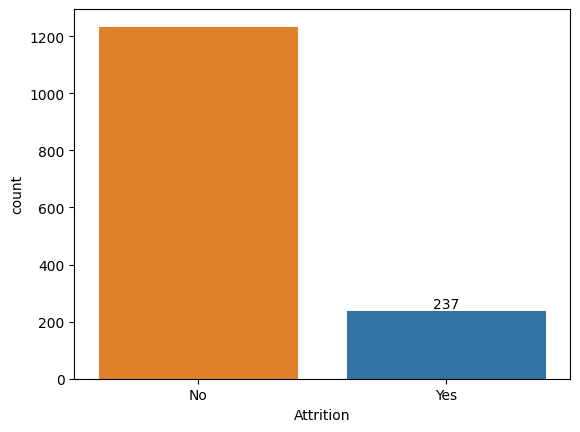

In [73]:
# Plotting the graph for the target data

ax = sns.countplot(x='Attrition', data=data,
                   order=data["Attrition"].value_counts().index,hue="Attrition")
ax.bar_label(ax.containers[0])
plt.show()

# Univariate **Analysis**

data.select_dtypes('number'):

Selects only numerical columns (int64, float64).
.columns:

Extracts column names.
list(...):

Converts the column names into a list.
🔹 num_lst now contains all numerical column names.

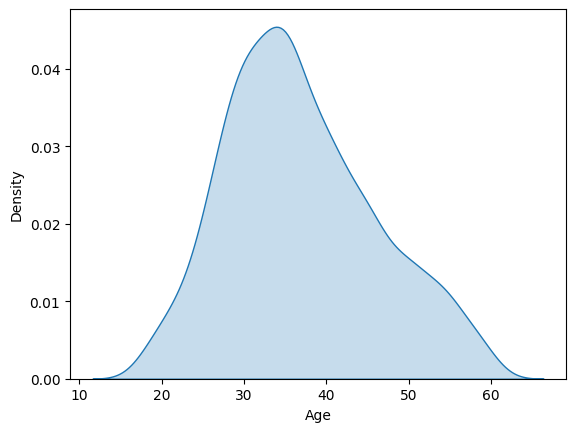

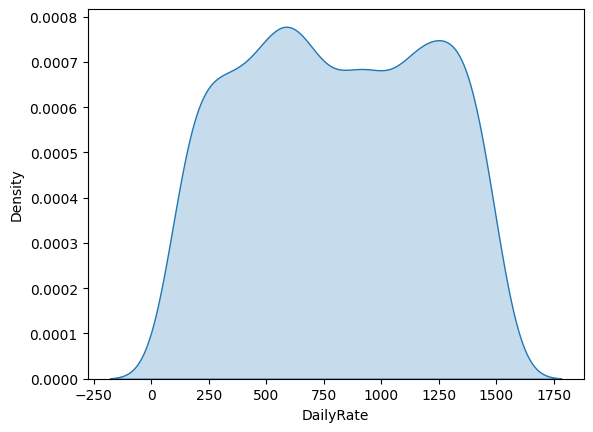

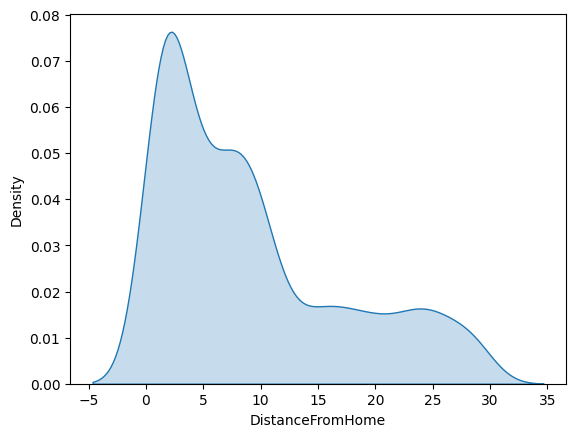

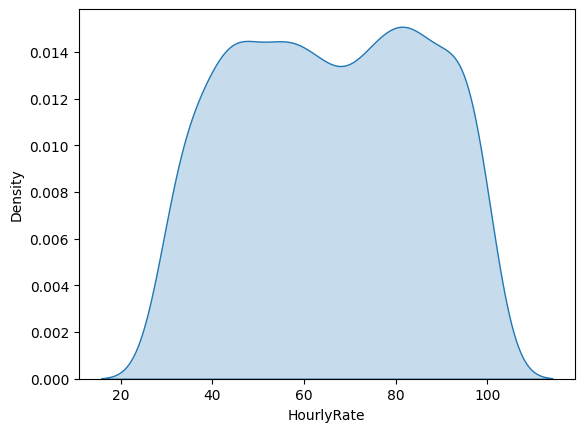

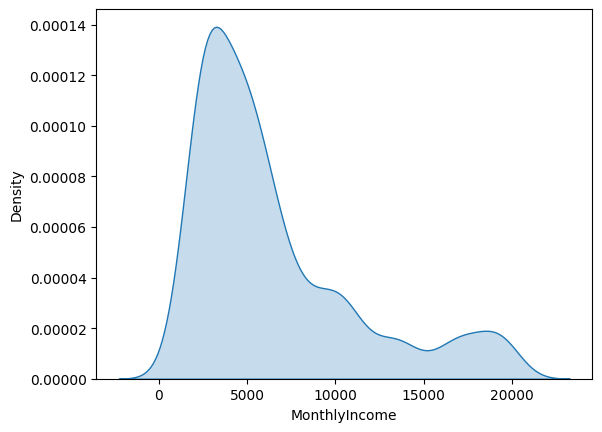

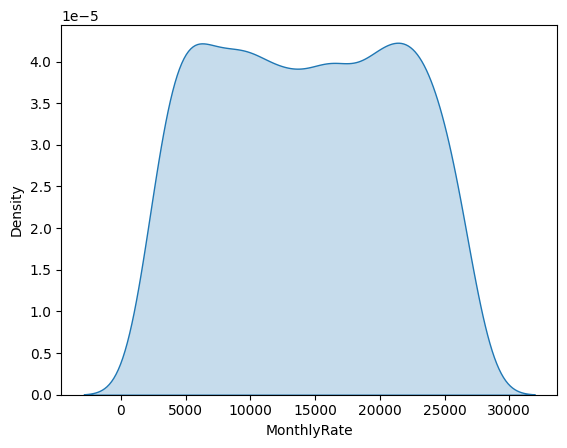

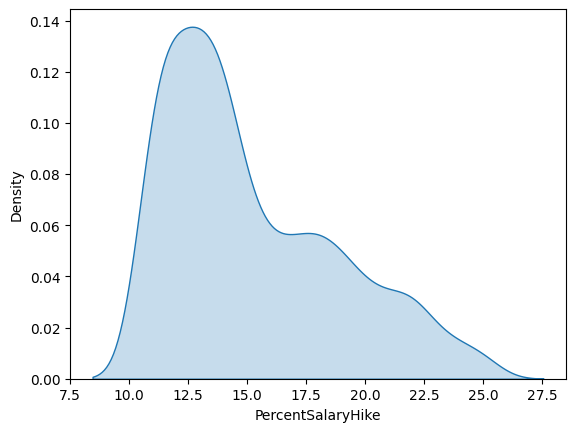

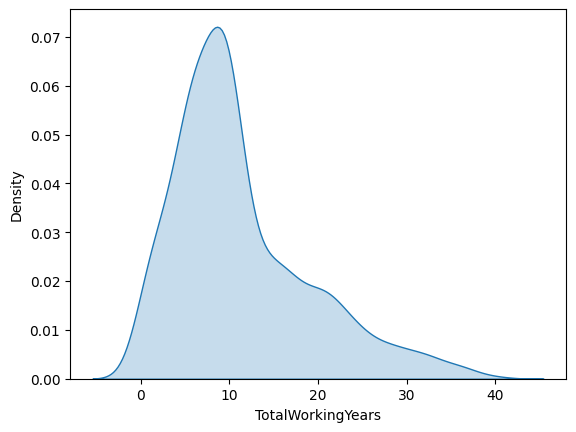

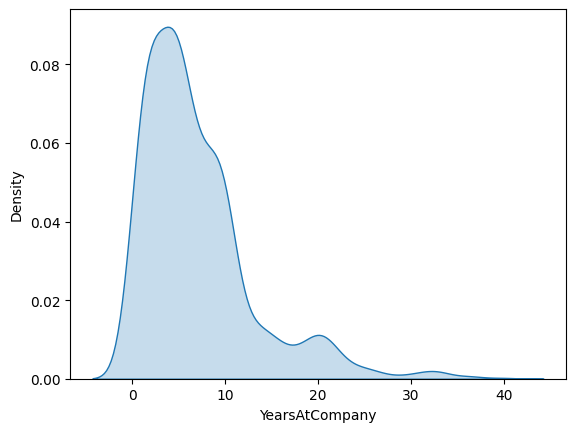

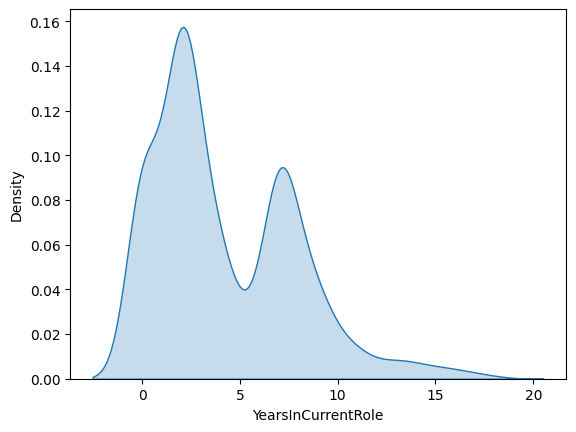

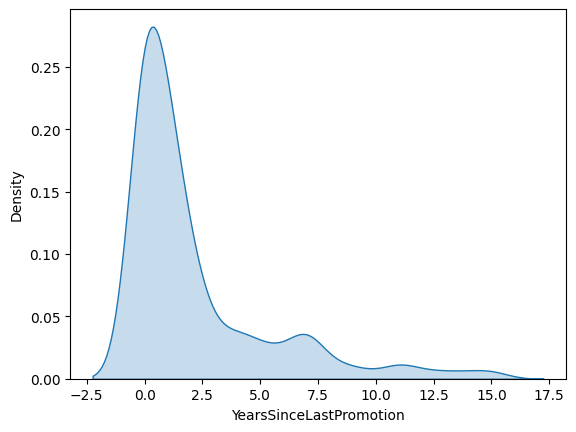

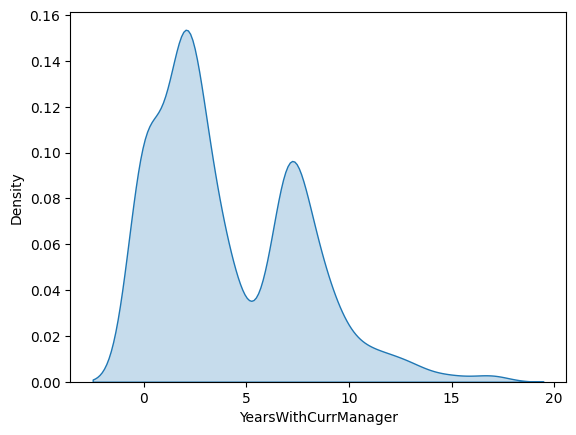

In [80]:
num_lst = list(data.select_dtypes('number').columns)
cat_lst = list(data.select_dtypes('object').columns)

for cols in num_lst:
    if data[cols].nunique() > 10:  # Check if unique values are greater than 10
        sns.kdeplot(data[cols], fill=True)  # Kernel Density Estimation (KDE) plot
        plt.show()  # Display the plot


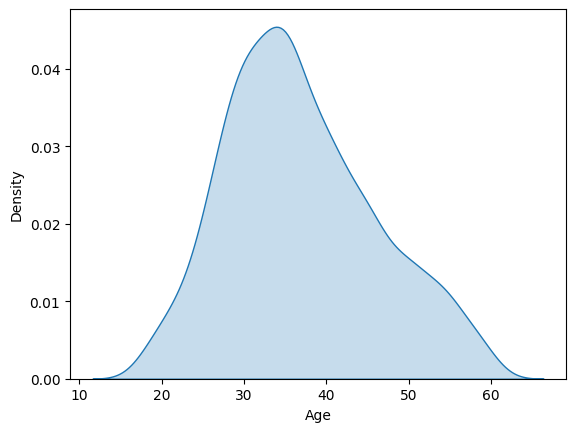

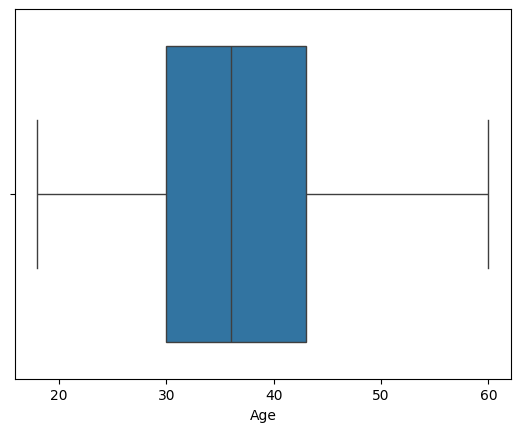

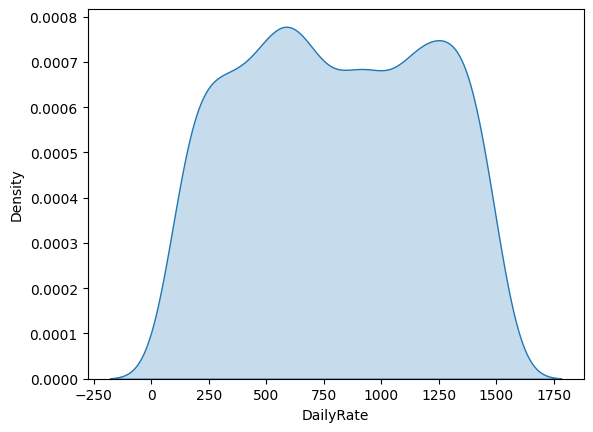

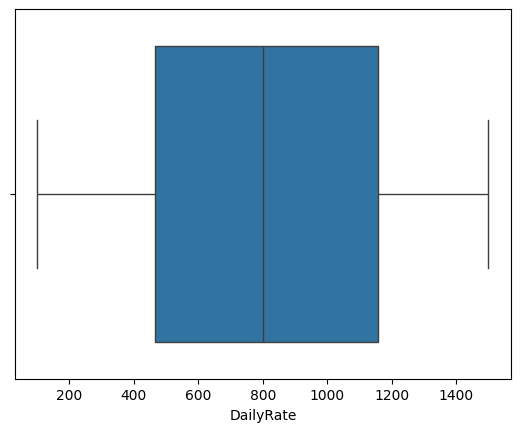

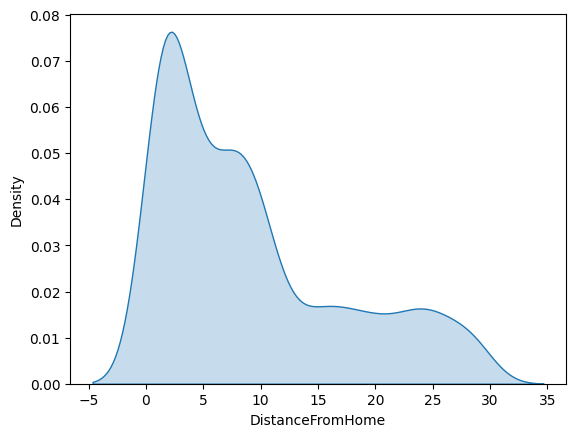

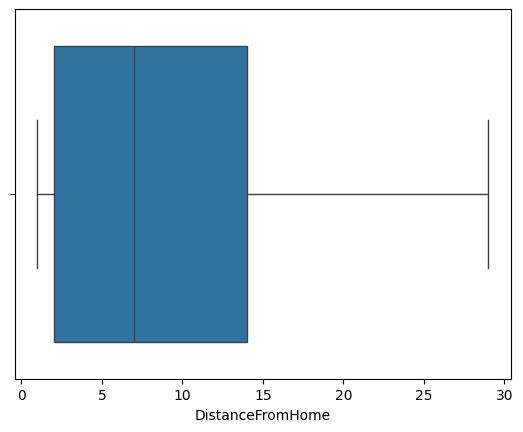

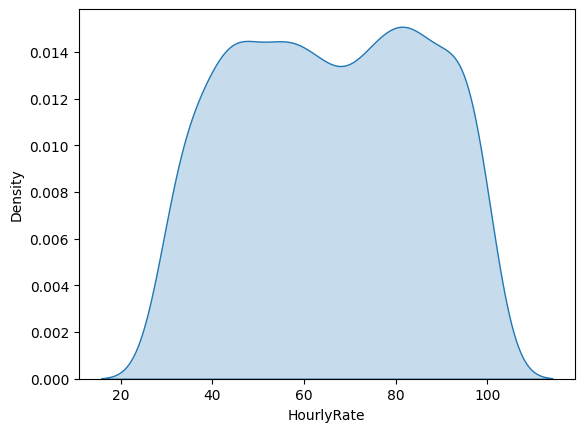

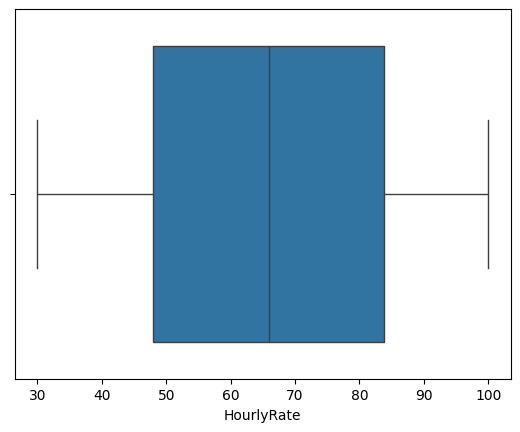

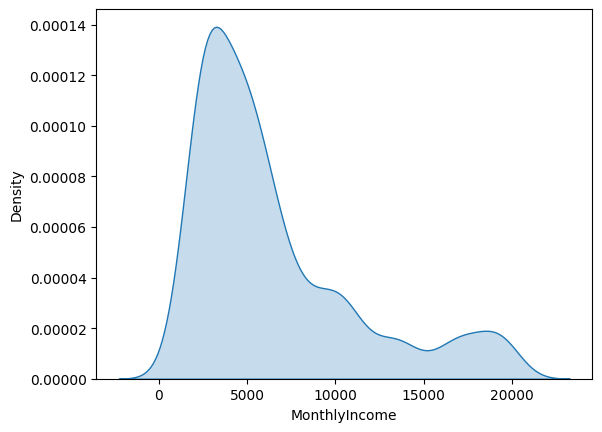

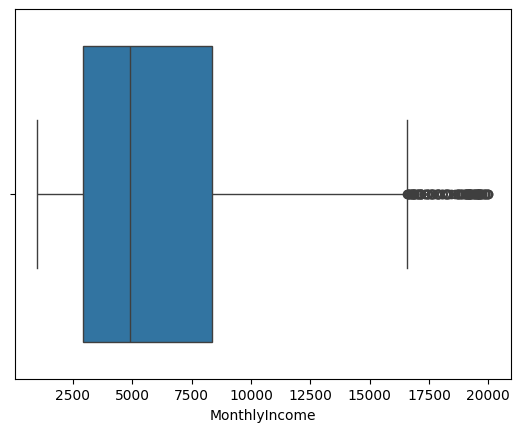

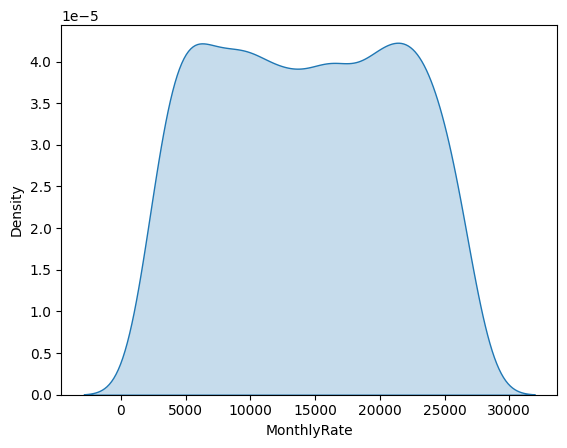

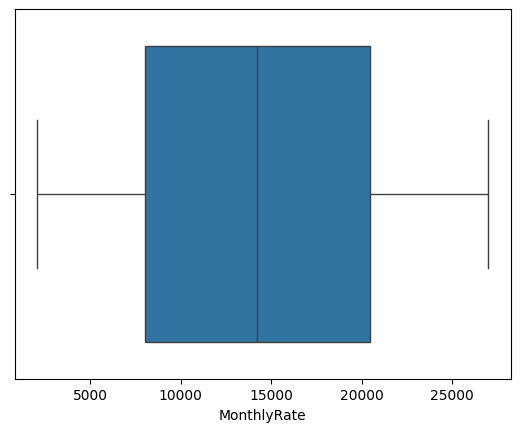

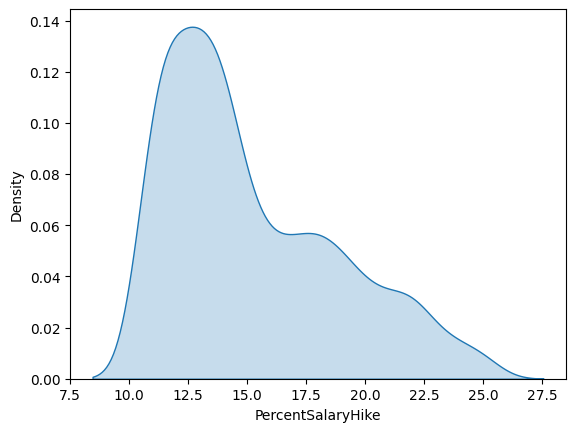

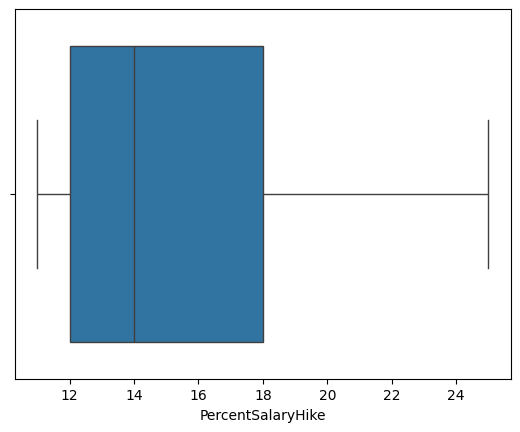

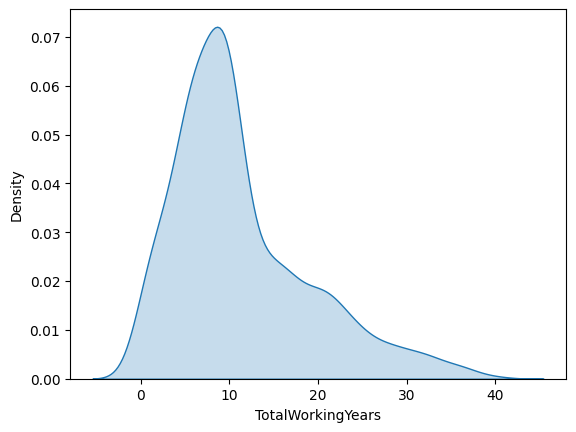

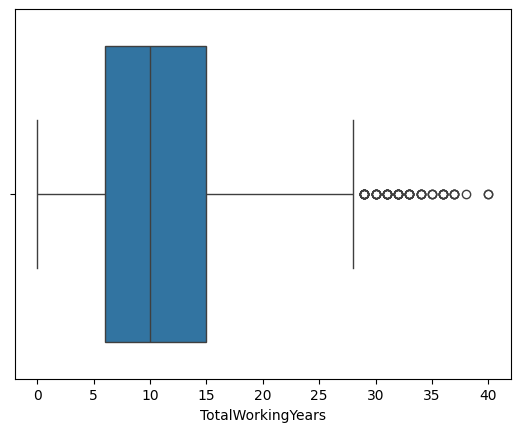

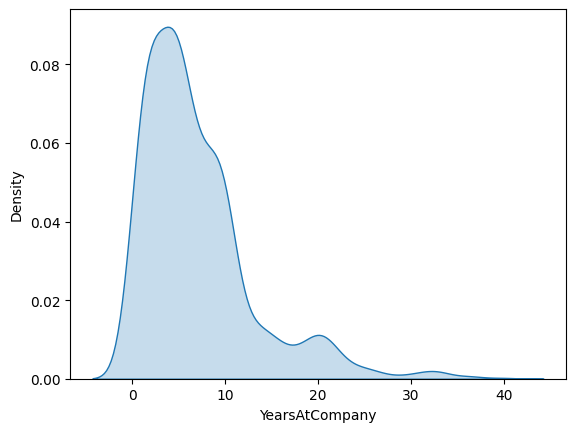

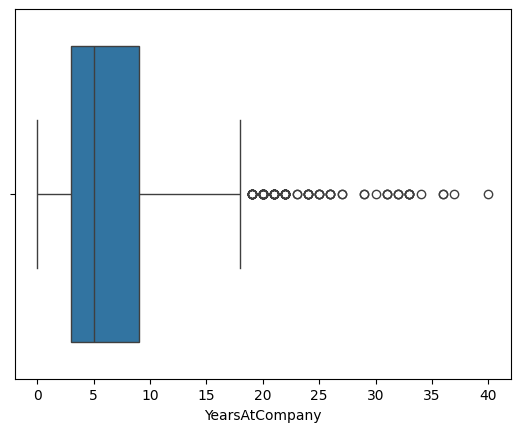

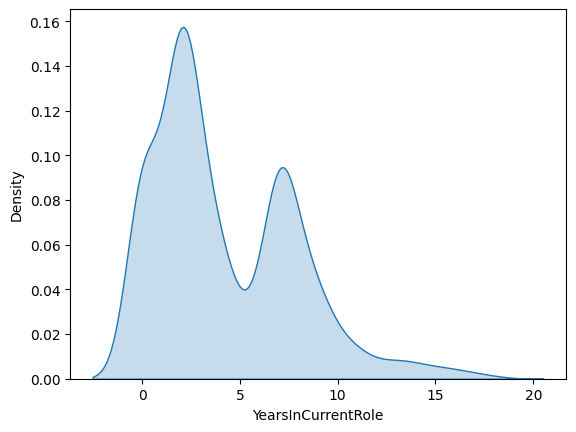

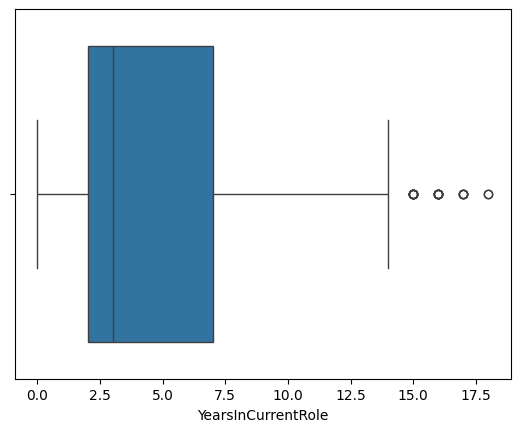

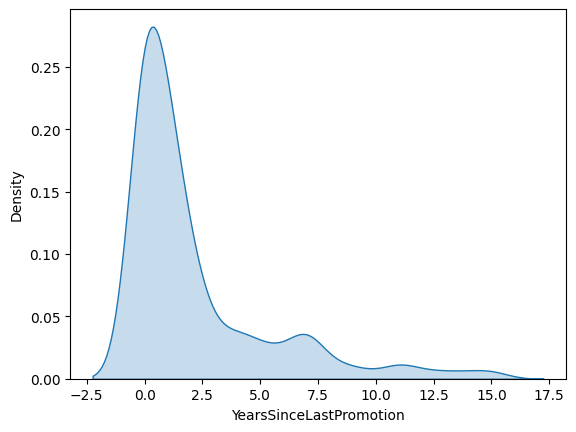

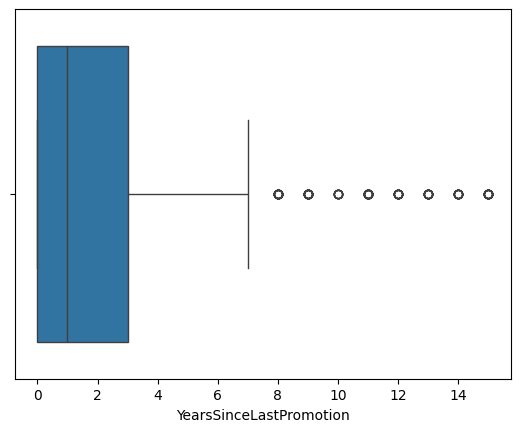

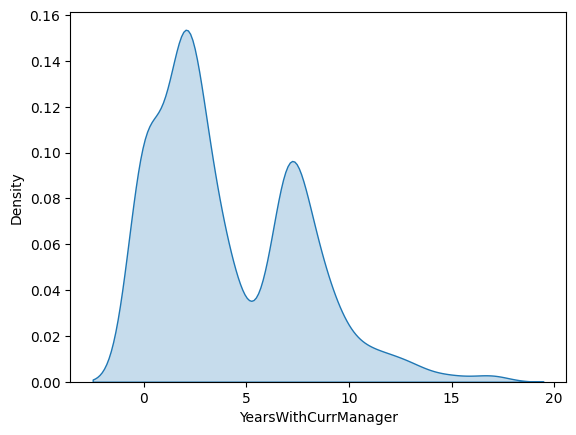

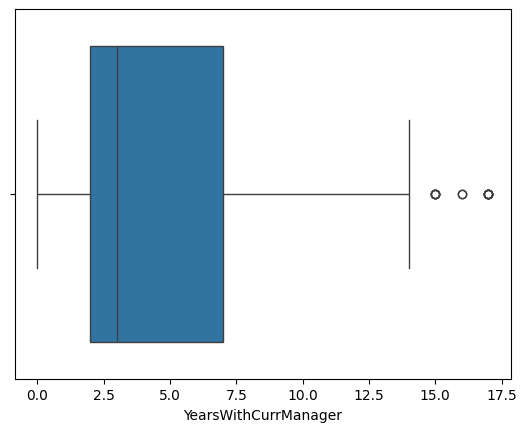

In [81]:
num_lst = list(data.select_dtypes('number').columns)
cat_lst = list(data.select_dtypes('object').columns)

for cols in num_lst:
    if data[cols].nunique() > 10:
        sns.kdeplot(data[cols], fill=True)
        plt.show()
        sns.boxplot(data[cols], orient='h')
        plt.show()

In [82]:
# appending the categorical data from numerical columns into cat_lst

for cols in num_lst:
    if data[cols].nunique() <= 10:
        cat_lst.append(cols)

print(cat_lst)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


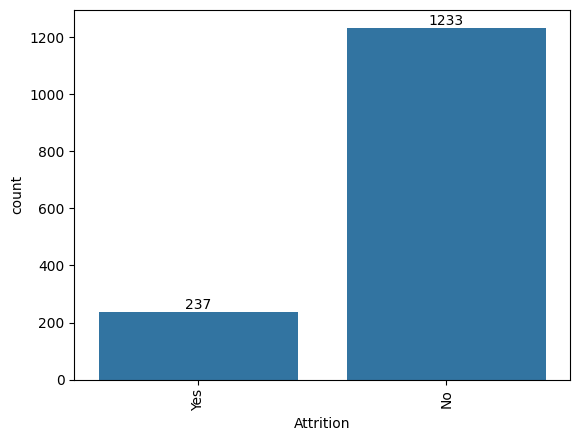

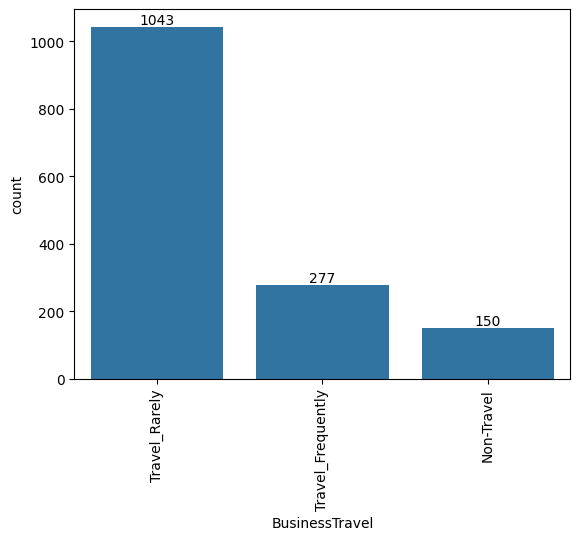

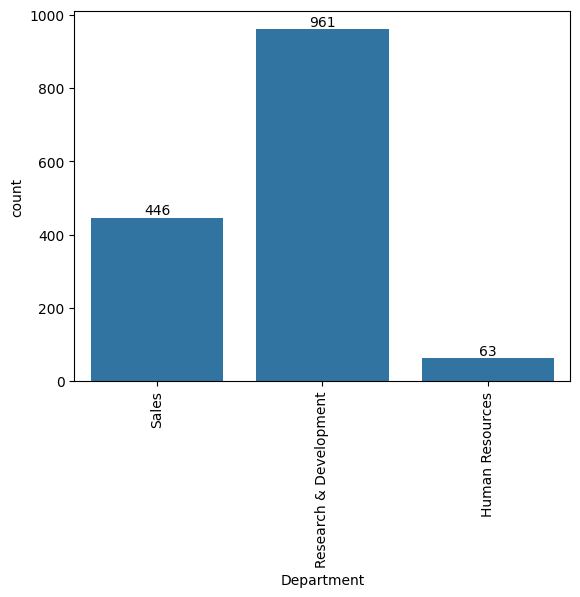

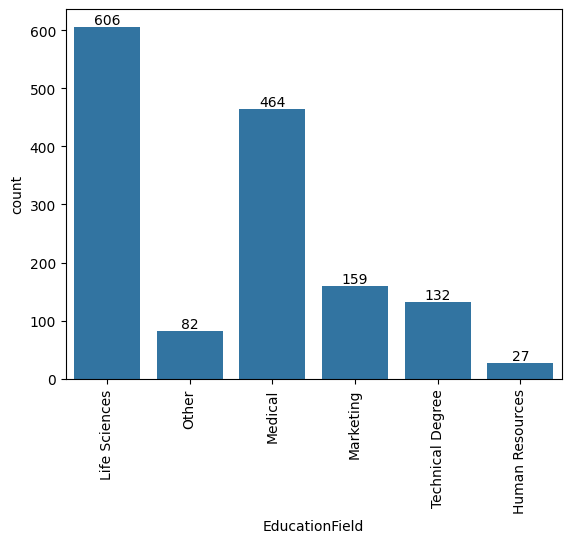

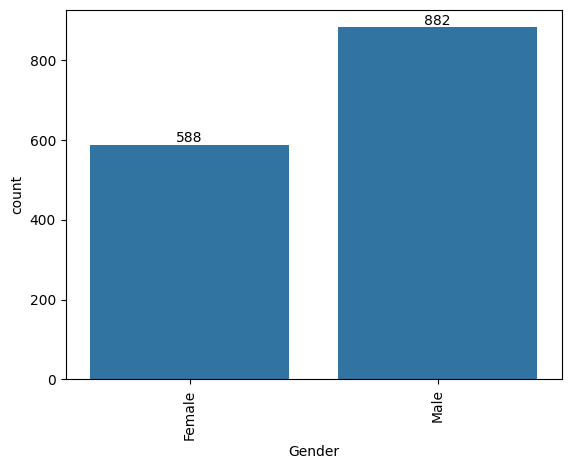

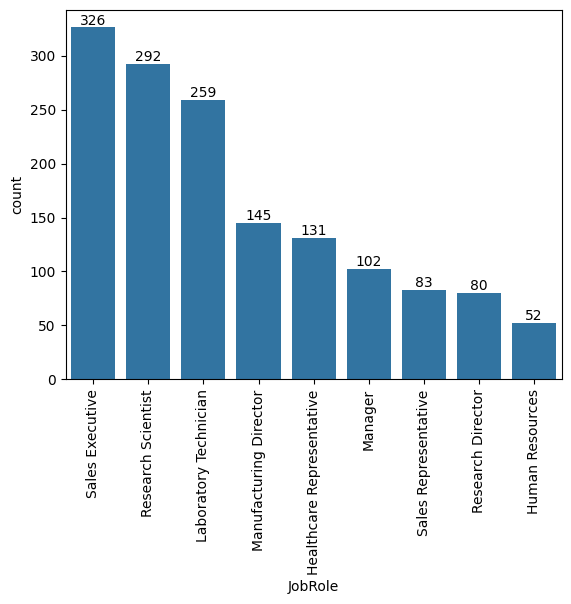

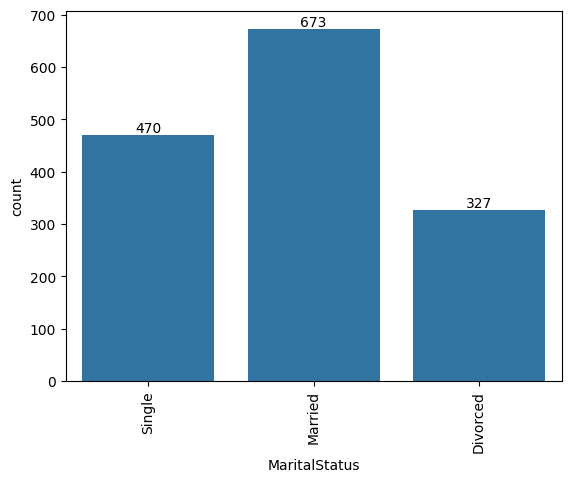

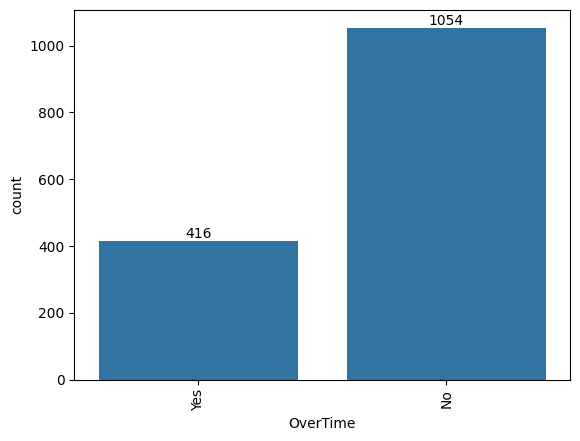

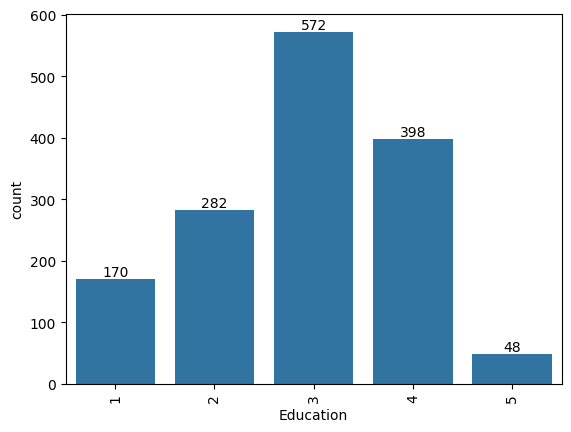

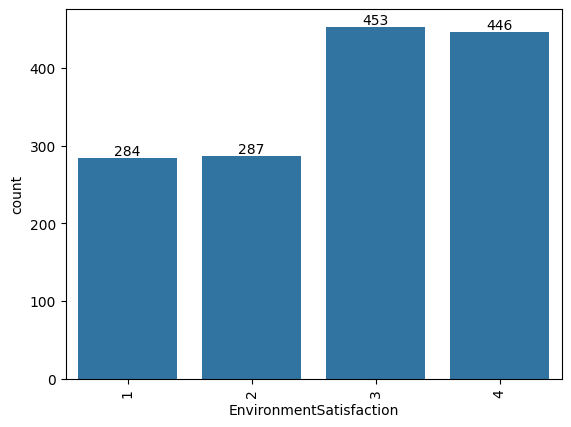

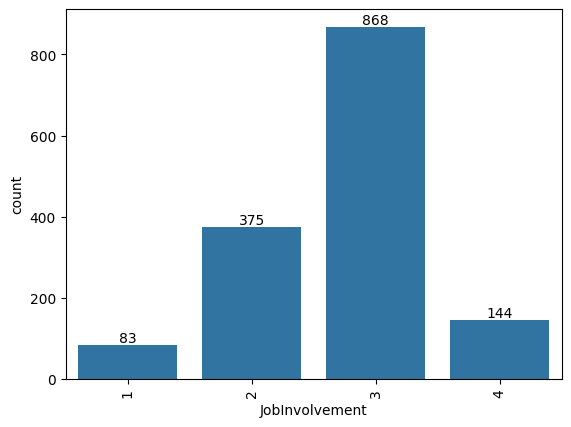

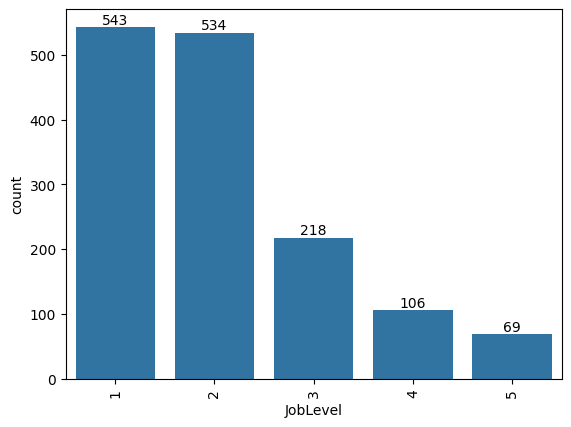

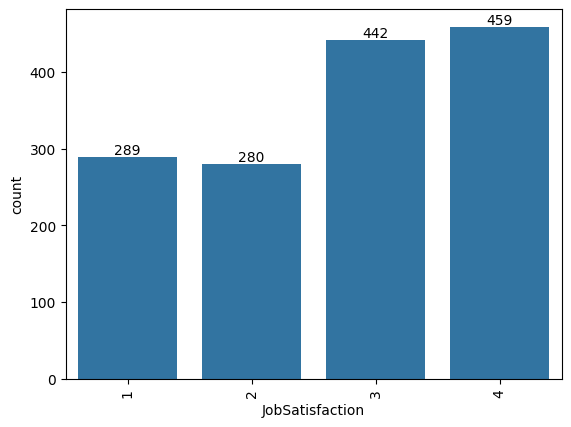

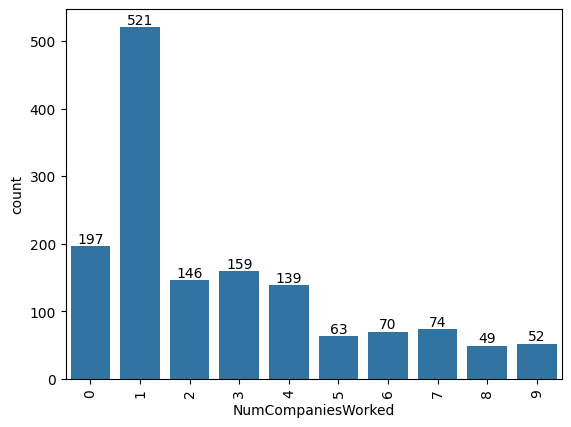

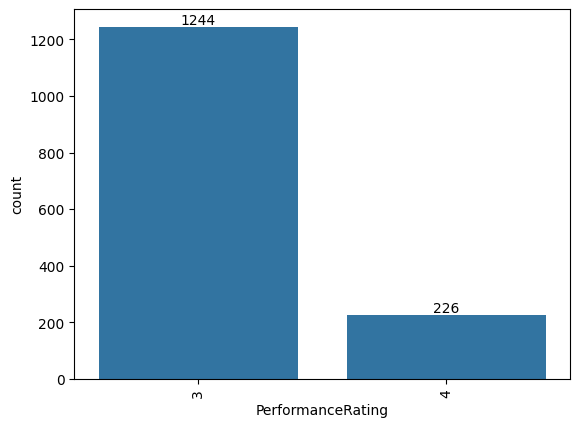

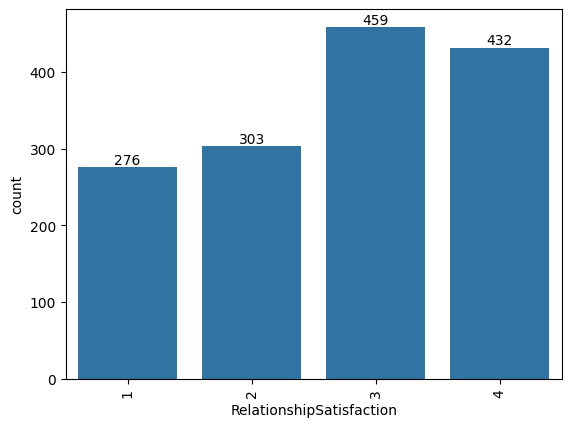

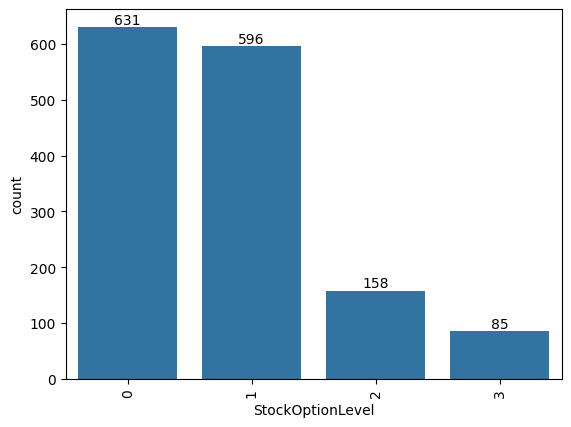

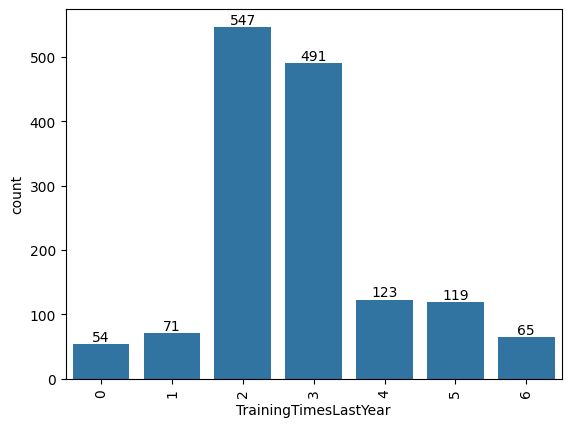

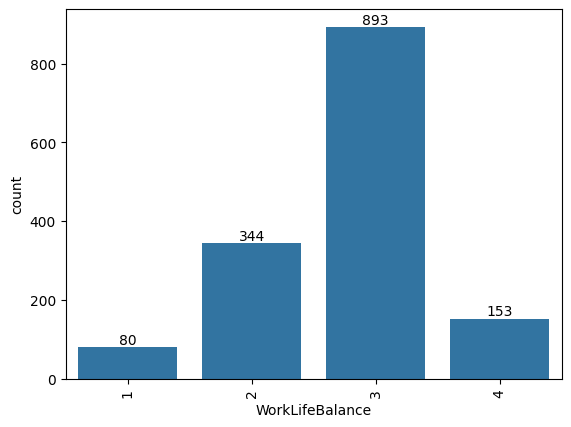

In [83]:
# count plot for categorical data
for cols in cat_lst:
    ax = sns.countplot(x=data[cols])
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)
    plt.show()